# Lab 9

SVD using image

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
im = Image.open(r"C:\Users\HP\Downloads\scenery3.png")
im.show()
#this model will show the image in any image viewer

Text(0.5, 1.0, 'Original RGB Image')

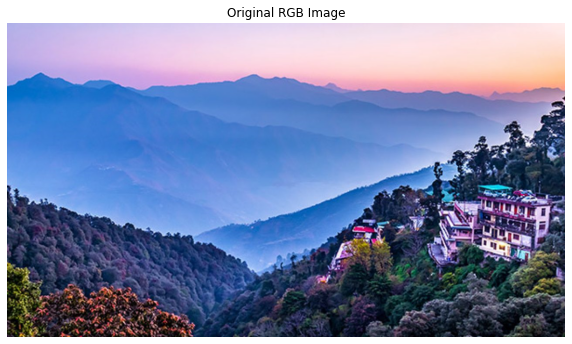

In [4]:
#import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r"C:\Users\HP\Downloads\scenery3.png")
plt.figure(figsize=(10,10))
plt.axis("off") #to hide axis use 'off'
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')

In [5]:
#Calculating the SVD
u,s,v=np.linalg.svd(img,full_matrices=False)

#inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(720, 1280, 3),s.shape:(720, 3),v.shape:(720, 3, 3)


Text(0.5, 1.0, 'Original RGB Image in Greyscale')

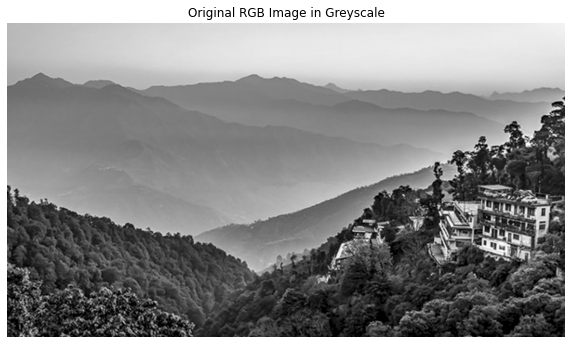

In [6]:
img_grey = cv2.imread(r"C:\Users\HP\Downloads\scenery3.png",0)  #set flag =0 for grey scale image
plt.figure(figsize=(10,10))
plt.axis("off") #to hide axis use 'off'
plt.imshow(cv2.cvtColor(img_grey,cv2.COLOR_BGR2RGB),cmap='gray')   #or use cv2.COLOR_BGR2GRAY for gray scale image
plt.title('Original RGB Image in Greyscale')

In [7]:
#Calculating the SVD
#to remove the third dimension of RGB colors, we will convert the image into grayscale

u_grey,s_grey,v_grey=np.linalg.svd(img_grey,full_matrices=False)

#inspect shapes of the matrices
print(f'u.shape:{u_grey.shape},s.shape:{s_grey.shape},v.shape:{v_grey.shape}')

u.shape:(720, 720),s.shape:(720,),v.shape:(720, 1280)


Text(0.5, 1.0, 'Actual Image')

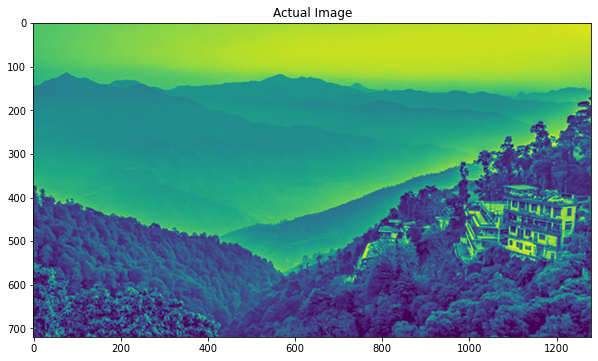

In [8]:
plt.figure(figsize=(10,10))
orig_rank=u_grey[:,:]@np.diag(s_grey[:])@v_grey[:,:]
plt.imshow(orig_rank)
plt.title('Actual Image')

In [14]:
# We need to calculate the variance in order to find the relevant/important components.
import seaborn as sns

var_explained = np.round(s**2/np.sum(s**2), decimals = 6)

# Variance explained by top Singular Vectors.
print(f"Variance Explained by the top 20 Singular Vectors: \n{var_explained[0:20]}")

# Barplot for the Variance Explained by top 20 Singular Values.

sns.barplot(x = list(range(1,21)), y = var_explained[0:20], color = 'blue')

plt.title('Variance Explained by Top 20 Singular Vectors')
plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.tight_layout()
plt.show()

Variance Explained by the top 20 Singular Vectors: 
[[3.128e-03 6.000e-06 0.000e+00]
 [3.128e-03 6.000e-06 0.000e+00]
 [3.130e-03 6.000e-06 0.000e+00]
 [3.135e-03 6.000e-06 0.000e+00]
 [3.139e-03 6.000e-06 0.000e+00]
 [3.146e-03 6.000e-06 0.000e+00]
 [3.148e-03 6.000e-06 0.000e+00]
 [3.150e-03 6.000e-06 0.000e+00]
 [3.159e-03 6.000e-06 0.000e+00]
 [3.163e-03 6.000e-06 0.000e+00]
 [3.165e-03 6.000e-06 0.000e+00]
 [3.171e-03 6.000e-06 0.000e+00]
 [3.178e-03 6.000e-06 0.000e+00]
 [3.188e-03 6.000e-06 0.000e+00]
 [3.191e-03 6.000e-06 0.000e+00]
 [3.192e-03 6.000e-06 0.000e+00]
 [3.197e-03 6.000e-06 0.000e+00]
 [3.198e-03 5.000e-06 0.000e+00]
 [3.201e-03 5.000e-06 0.000e+00]
 [3.204e-03 5.000e-06 0.000e+00]]


ValueError: Data must be 1-dimensional

In [11]:
# Plotting images with different number of components.
comps = [438,420,379,350,300,200,100,80,70,60,50,20,15,10,5,1]
plt.figure(figsize = (25,25))

# Creating Image Matrices for various n_components.
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i],:]
    
    # If n_components = total components
    if (i==0):
        plt.subplot(6,3, i+1),
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Original Image with {comps[i]} n_components')
    
    # Images with n_components = i
    else:
        plt.subplot(6,3, i+1),
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Image with {comps[i]} n_components')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 438)

<Figure size 1800x1800 with 0 Axes>